In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

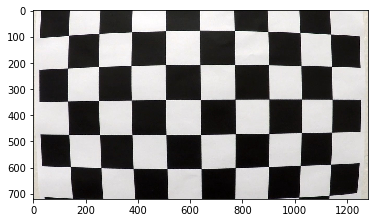

In [12]:
# Check how many corners
img = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(img)

In [13]:
nx = 9
ny = 6

In [14]:
# Read in image names
images = glob.glob('camera_cal/*.jpg')

In [15]:
# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

In [16]:
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ... since chess board is flat, z axis == 0
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

In [17]:
for fname in images:
    img = mpimg.imread(fname) 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert to grayscale
    ret, corners = cv2.findChessboardCorners(img, (nx,ny), None)
    if ret == True: # If the image doesn't contain nx*ny corners, ret will return False
        imgpoints.append(corners)
        objpoints.append(objp)        

In [18]:
# calculate parameters
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[::-1], None, None)
# ture/false, camera matrix, distortion coef, rotation vectors, translation vectors.

Text(0.5,1,'camera_cal/calibration12.jpg')

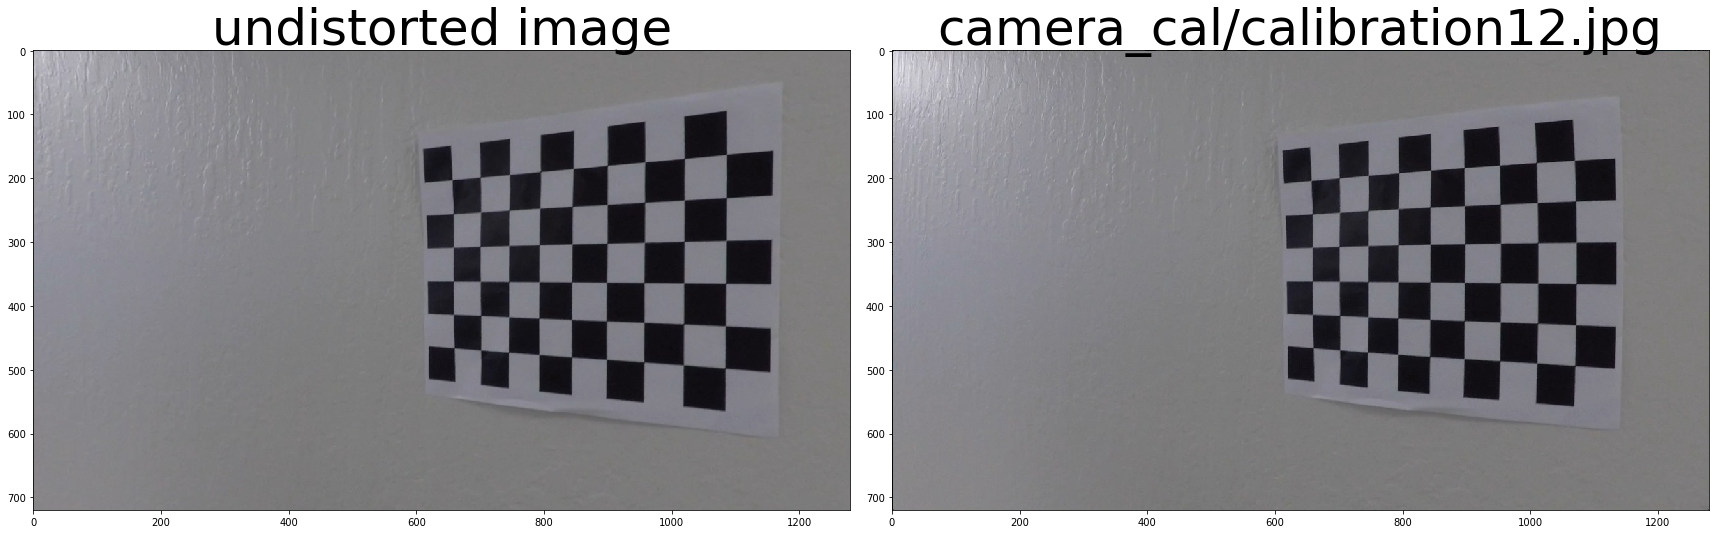

In [19]:
# Apply parameters to undistort a random image from cam_cal images
undist_fname = images[np.random.randint(0,len(images)-1)]
undist_img = mpimg.imread(undist_fname)
dst = cv2.undistort(undist_img, mtx, dist, None, mtx)

# Plot results and compare with original
f, (ax1, ax2) = plt.subplots(1,2,figsize = (24,9))
f.tight_layout()
ax1.imshow(dst)
ax1.set_title('undistorted image', fontsize=50)
ax2.imshow(undist_img)
ax2.set_title(undist_fname, fontsize=50)

Text(0.5,1,'test_images/test5.jpg')

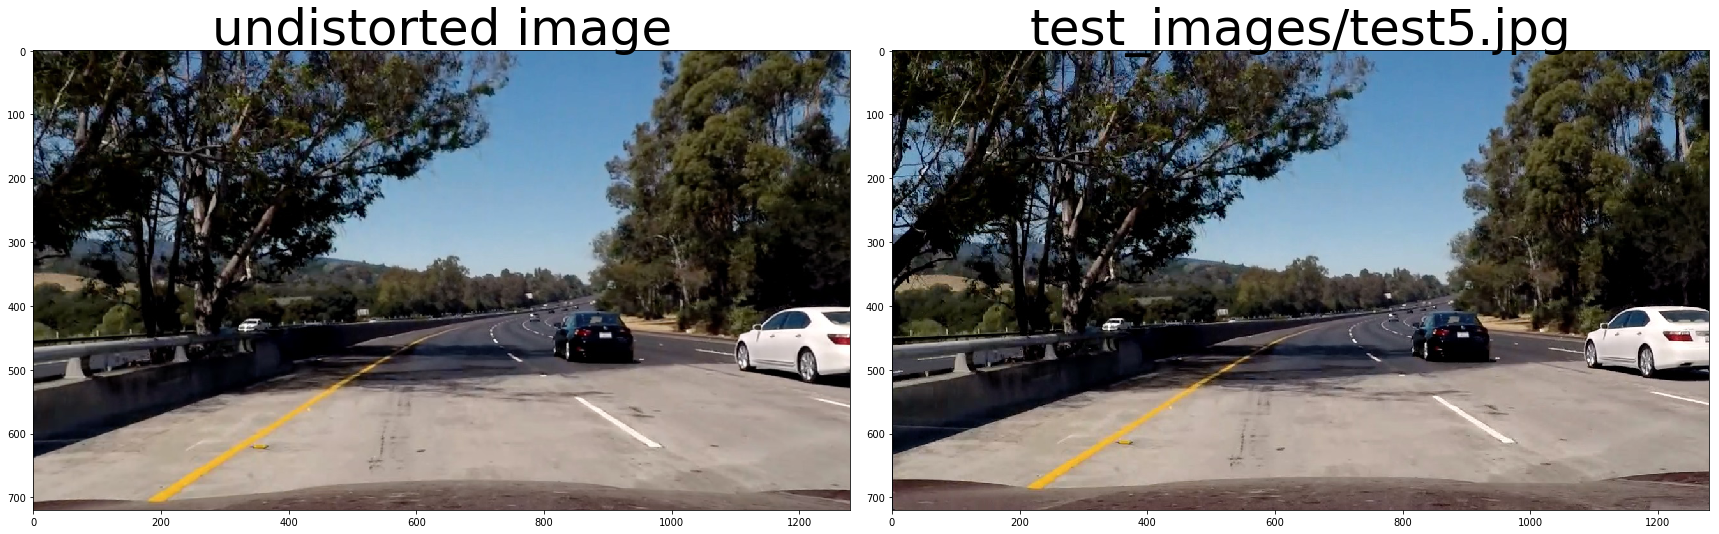

In [20]:
# Apply parameters to undistort a random image from test_images
test_images = glob.glob('test_images/*.jpg')
undist_fname = test_images[np.random.randint(0,len(test_images)-1)]
undist_img = mpimg.imread(undist_fname)
dst = cv2.undistort(undist_img, mtx, dist, None, mtx)

# Plot results and compare with original
f, (ax1, ax2) = plt.subplots(1,2,figsize = (24,9))
f.tight_layout()
ax1.imshow(dst)
ax1.set_title('undistorted image', fontsize=50)
ax2.imshow(undist_img)
ax2.set_title(undist_fname, fontsize=50)